In [116]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [117]:
#IMPORTANDO BASE DE DADOS
df = pd.read_csv('dados_produtos.csv')
df.head()


,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [118]:
#ANALISE DOS TIPOS/QUANTIDADE DE DADOS
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


Text(0.5, 1.0, 'Notas dos Produtos')

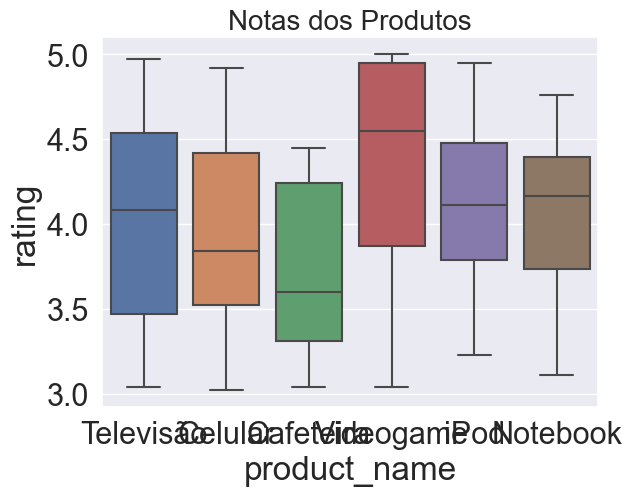

In [119]:
#ANÁLISE UTILIZANDO BOXPLOT, P/ VERIFICAR OUTLIERS
sns.boxplot(y=df['rating'], x=df['product_name'])
sns.set(font_scale = 2)
plt.title('Notas dos Produtos', fontsize = 20)
# plt.xlabel('Produtos ', fontsize = 16)
# plt.ylabel('Notas', fontsize = 16)

In [120]:
#retorna valores nulos
df.isnull()

,product_name,rating,rating_count,purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [121]:
#TRANSFORMANDO A COLUNA purchased EM VARIAVEL CATEGÓRICA
purchased = {0 : 'Não Comprou', 1 : 'Comprou'}
df = df.replace({'purchased' : purchased})
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,Comprou
1,Celular,3.46,3872,Não Comprou
2,Cafeteira,3.25,1187,Não Comprou
3,Televisão,3.77,4097,Comprou
4,Videogame,5.00,4738,Comprou


In [122]:
products = df['product_name'].unique()

for product in products:

    print(f'\n--------- Árvore de Decisão do Produto {product} --------------')

    product_df = df.loc[df['product_name'] == product]

    x = product_df.drop(['purchased', 'product_name'], axis = 1)
    y = product_df['purchased']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier
    model = dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore: ')

    product_df['Compras'] = product_df['Compras'].replace([1, 0], ['Comprou', 'Não comprou'])

    fig = plt.figure(figsize=(10,8))

    tree.plot_tree(model, feature_names=product_df['Nota'].tolist(), class_names=product_df['Compras'].tolist(), filled=True)
    plt.title(f'Arvore decisao - {product}')



--------- Árvore de Decisão do Produto Televisão --------------


AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [ ]:
df_televisao = df[df["product_name"] == 'Televisão']
# print(linhas_televisao)

In [ ]:
rating_televisao = df_televisao['rating']
rating_televisao = rating_televisao.array
print(rating_televisao)

<PandasArray>
[3.04, 3.77, 4.68, 3.14, 3.14, 4.24, 4.12, 4.08,  4.8, 3.05, 3.45, 4.96, 4.97,
 3.49, 3.71, 4.47, 4.01,  4.6, 4.33]
Length: 19, dtype: float64


In [ ]:
compra = df['purchased']
produto = df['product_name']
nota = df['rating']
notaGeral = df['rating_count']
notas = nota.array
compras = compra.array
produto = produto.array





KeyError: 'purchased'

In [ ]:
notas_treino, notas_teste, compra_treino, compra_teste = train_test_split(notas.reshape(-1,1), compras.reshape(-1,1), test_size = 0.2, random_state= 42) # reshape, organizar o dataframe 



In [ ]:
#isntanciando o modelo
modelo = DecisionTreeClassifier()

#treinando o modelo
modelo.fit(notas_treino, compra_treino)

In [ ]:
#PLOTANDO A ARVORE DE DECISÃO
fig= plt.figure(figsize=(50,20))
tree.plot_tree(modelo, feature_names = notas.tolist(), class_names=compras.tolist(), filled=True)